In [9]:
#Red Neuronal Convolucional aplicadas en

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import os

#Imágenes tomadas de Kaggle (Butterfly Image Classification)
#https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification

# Crear un directorio para almacenar las imágenes
os.makedirs('images', exist_ok=True)

# Se descargaron los archivos de imágenes desde Kaggle.
# Se seleccionaron las primeras 1.772 imágenes del conjunto train, para
# facilitar el procesamiento

Número de imágenes encontradas: 1772


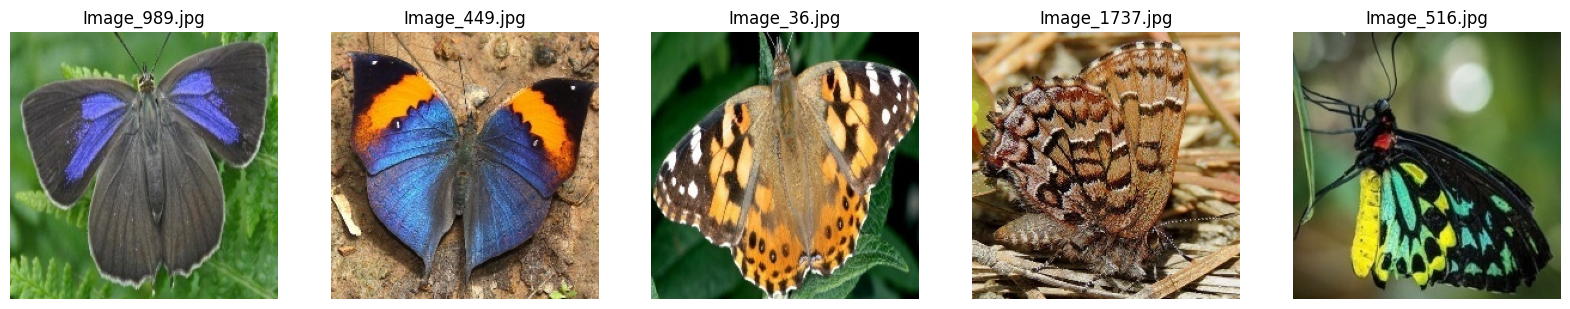

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

# Especificar el directorio que contiene las imágenes
image_dir = 'images'

# Listar los archivos en el directorio
images = os.listdir(image_dir)
print(f'Número de imágenes encontradas: {len(images)}')

# Mostrar algunas imágenes para verificar
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    img_path = os.path.join(image_dir, images[i])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(images[i])
    axes[i].axis('off')
plt.show()



In [11]:
import cv2
import os

# Ruta al directorio de imágenes
directory = 'images'

# Lista para almacenar las imágenes
images = []

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Puedes añadir más formatos de imagen si es necesario
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
            height, width, channels = image.shape
           #print(f"Imagen: {filename}, Ancho: {width}, Altura: {height}")

# Verificar el tamaño de la segunda imagen cargada (índice 1)
if len(images) > 1:
    height, width, channels = images[1].shape
    print(f"Tamaño de la segunda imagen - Ancho: {width}, Altura: {height}, Canales: {channels}")
else:
    print("No hay suficientes imágenes en la lista.")

Tamaño de la segunda imagen - Ancho: 224, Altura: 224, Canales: 3


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Tamaño de las imágenes (ajustar según sea necesario)
img_size = (64, 64)

# Función para leer y procesar una imagen
def load_and_preprocess_image(image_path, img_size):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    return img_array

# Leer el archivo CSV con pandas
labels_df = pd.read_csv('Training_set_1.csv')

# Verificar las primeras filas del DataFrame para asegurarse de que se ha cargado correctamente
print(labels_df.head())

# Filtrar solo archivos de imagen que están presentes en el CSV
image_files = labels_df['filename'].tolist()
labels = labels_df['label'].tolist()

print(f'Número de imágenes encontradas: {len(image_files)}')

# Procesar todas las imágenes en el directorio
image_data = []
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img_array = load_and_preprocess_image(img_path, img_size)
    image_data.append(img_array)


# Convertir la lista de imágenes a un array de NumPy
image_data = np.array(image_data)
labels = np.array(labels)
print(f'Tamaño del array de imágenes: {image_data.shape}')
print(f'Tamaño del array de etiquetas: {labels.shape}')

# Encontrar las clases únicas en las etiquetas
unique_classes = np.unique(labels)

# Contar el número de clases
num_classes = len(unique_classes)

print(f'Número de clases: {num_classes}')
print(f'Clases únicas: {unique_classes}')

# Convertir image_data y labels en un dataset de TensorFlow
image_dataset = tf.data.Dataset.from_tensor_slices((image_data, labels))

# Verificar las dimensiones de los datos
for image, label in image_dataset.take(1):
    print("Dimensiones de una imagen en el dataset:", image.shape)
    print("Etiqueta correspondiente:", label.numpy())

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART
Número de imágenes encontradas: 1772
Tamaño del array de imágenes: (1772, 64, 64, 3)
Tamaño del array de etiquetas: (1772,)
Número de clases: 75
Clases únicas: ['ADONIS' 'AFRICAN GIANT SWALLOWTAIL' 'AMERICAN SNOOT' 'AN 88' 'APPOLLO'
 'ATALA' 'BANDED ORANGE HELICONIAN' 'BANDED PEACOCK' 'BECKERS WHITE'
 'BLACK HAIRSTREAK' 'BLUE MORPHO' 'BLUE SPOTTED CROW' 'BROWN SIPROETA'
 'CABBAGE WHITE' 'CAIRNS BIRDWING' 'CHECQUERED SKIPPER' 'CHESTNUT'
 'CLEOPATRA' 'CLODIUS PARNASSIAN' 'CLOUDED SULPHUR' 'COMMON BANDED AWL'
 'COMMON WOOD-NYMPH' 'COPPER TAIL' 'CRECENT' 'CRIMSON PATCH'
 'DANAID EGGFLY' 'EASTERN COMA' 'EASTERN DAPPLE WHITE'
 'EASTERN PINE ELFIN' 'ELBOWED PIERROT' 'GOLD BANDED' 'GREAT EGGFLY'
 'GREAT JAY' 'GREEN CELLED CATTLEHEART' 'GREY HAIRSTREAK'

In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

images_array = np.array(image_data)

# 1. Normalizar las imágenes (escala de 0 a 1)
images_array = images_array.astype(np.float32) / 255.0

print("Imágenes normalizadas, forma del array:", images_array.shape)

# 2. Convertir etiquetas de texto a valores numéricos
# Asegúrate de que labels_array contiene etiquetas de texto
labels_array = np.array(labels)  # Si ya está como texto, conviértelo a una lista de strings si es necesario

# Crear un LabelEncoder y ajustar a las etiquetas
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels_array.flatten())  # Aplanar para ajustar el encoder

# Convertir a array numpy
labels_int = np.array(labels_int)

# Asegúrate de que las dimensiones coincidan con las imágenes
print("Etiquetas como array:", labels_int.shape)

Imágenes normalizadas, forma del array: (1772, 64, 64, 3)
Etiquetas como array: (1772,)


In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba si es necesario
from sklearn.model_selection import train_test_split

# Dividir las imágenes y etiquetas en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(
    images_array, labels_int, test_size=0.3, random_state=42
)

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

Forma de las imágenes de entrenamiento: (1240, 64, 64, 3)
Forma de las etiquetas de entrenamiento: (1240,)
Forma de las imágenes de prueba: (532, 64, 64, 3)
Forma de las etiquetas de prueba: (532,)


In [15]:
!pip install scikeras

In [16]:
pip install --upgrade tensorflow

In [20]:
#Construcción del modelo
#Construir el modelo de clasificación
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

# Definir un modelo simple como ejemplo
# Definir el modelo con el número correcto de clases
# Definir el modelo
model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.20),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.20),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 75)                  │           9,675 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,715 (12.58 MB)

 Trainable params: 3,296,715 (12.58 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 23s 535ms/step - accuracy: 0.0158 - loss: 4.4061 - val_accuracy: 0.0376 - val_loss: 4.1865
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 559ms/step - accuracy: 0.0657 - loss: 4.0103 - val_accuracy: 0.0940 - val_loss: 3.8113
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 577ms/step - accuracy: 0.1933 - loss: 3.3534 - val_accuracy: 0.2274 - val_loss: 3.1847
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 581ms/step - accuracy: 0.4041 - loss: 2.3434 - val_accuracy: 0.2989 - val_loss: 2.8749
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 42s 621ms/step - accuracy: 0.5704 - loss: 1.5859 - val_accuracy: 0.3026 - val_loss: 3.0298
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 531ms/step - accuracy: 0.7180 - loss: 1.0450 - val_accuracy: 0.3045 - val_loss: 2.9375
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 525ms/step - accuracy: 0.8608 - loss: 0.5442 - val_accuracy: 0.3008 - val_loss: 3.3932
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 23s 573ms/step - accuracy: 0.9513 - loss: 0.2542 - val_accu

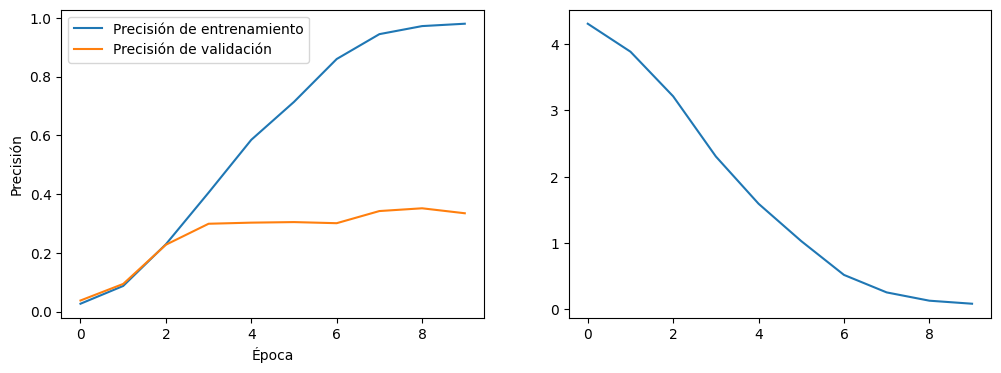

In [22]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=32)

# Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')

In [26]:
# Dividir las imágenes y etiquetas en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(
    images_array, labels_int, test_size=0.2, random_state=42)

print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)
print()

#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

Forma de las imágenes de entrenamiento: (1417, 64, 64, 3)
Forma de las etiquetas de entrenamiento: (1417,)
Forma de las imágenes de prueba: (355, 64, 64, 3)
Forma de las etiquetas de prueba: (355,)

45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.7510 - loss: 1.5186
Pérdida en el conjunto de entrenamiento: 0.5458803176879883
Precisión en el conjunto de entrenamiento: 0.9117854833602905
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.3251 - loss: 3.8726
Pérdida en el conjunto de prueba: 3.8258159160614014
Precisión en el conjunto de prueba: 0.34366196393966675


Etiquetas como array: (1772,)
Forma de las imágenes de entrenamiento: (1417, 12288)
Forma de las etiquetas de entrenamiento: (1417,)
Forma de las imágenes de prueba: (355, 64, 64, 3)
Forma de las etiquetas de prueba: (355,)

Tamaño de las imágenes de entrenamiento: 1417
Tamaño de las etiquetas de entrenamiento: 1417
Tamaño de las imágenes de prueba: 355
Tamaño de las etiquetas de prueba: 355
Forma de test_images después de reestructurar: (355, 64, 64, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step
Tamaño de las etiquetas predichas: 355
Tamaño de las etiquetas test_labels: 355
Tamaño de test_images: 355
Matriz de confusión (sklearn):
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Clases únicas en test_labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70

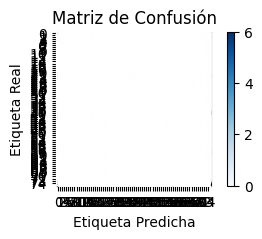


Cálculo utilizando librerias
TP: 3
TN: 2
FP: 0
FN: 0
Precisión (sklearn): 0.3436619718309859
Sensibilidad (sklearn): 0.3436619718309859
Especificidad (sklearn): 1.0


In [31]:
# Matriz de confusión utilizando librerias
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Aplanar las imágenes
num_samples = images_array.shape[0]
flattened_images = images_array.reshape(num_samples, -1)

# 2. Convertir etiquetas de texto a valores numéricos
# Asegúrate de que labels_array contiene etiquetas de texto
labels_array = np.array(labels)  # Si ya está como texto, conviértelo a una lista de strings si es necesario

# Crear un LabelEncoder y ajustar a las etiquetas
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels_array.flatten())  # Aplanar para ajustar el encoder

# Convertir a array numpy
labels_int = np.array(labels_int)

# Asegurando que las dimensiones coincidan con las imágenes
print("Etiquetas como array:", labels_int.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(flattened_images, labels_int, test_size=0.2, random_state=42)

# Restructurando las imágenes aplanadas
if test_images.shape[1] == 64*64*3:
    test_images = test_images.reshape(-1, 64, 64, 3)

# Normaliza las imágenes si es necesario
# test_images = test_images / 255.0


print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)
print()

print("Tamaño de las imágenes de entrenamiento:", len(train_images))
print("Tamaño de las etiquetas de entrenamiento:", len(train_labels))
print("Tamaño de las imágenes de prueba:", len(test_images))
print("Tamaño de las etiquetas de prueba:", len(test_labels))


print("Forma de test_images después de reestructurar:", test_images.shape)

pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)

print("Tamaño de las etiquetas predichas:", len(pred_labels))
print("Tamaño de las etiquetas test_labels:", len(test_labels))
print("Tamaño de test_images:", len(test_images))

# Asegurarse de que pred_labels y test_labels tienen la misma longitud
assert len(pred_labels) == len(test_labels), "El número de predicciones no coincide con el número de etiquetas reales."


# Obtener matriz de confusión utilizando sklearn
conf_matrix = confusion_matrix(test_labels, pred_labels)

# Imprimir la matriz de confusión para inspección
print("Matriz de confusión (sklearn):")
print(conf_matrix)

# Imprimir las clases únicas presentes en test_labels
print("Clases únicas en test_labels:", np.unique(test_labels))

# Imprimir las clases únicas presentes en pred_labels
print("Clases únicas en pred_labels:", np.unique(pred_labels))

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(test_labels, pred_labels))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(test_labels))), np.unique(test_labels))
plt.yticks(np.arange(len(np.unique(test_labels))), np.unique(test_labels))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
for i in range(len(np.unique(test_labels))):
    for j in range(len(np.unique(test_labels))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print()
print("Cálculo utilizando librerias")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

# Calcular precisión, sensibilidad y especificidad utilizando sklearn
precision_sklearn = precision_score(test_labels, pred_labels, average='micro')
sensibilidad_sklearn = recall_score(test_labels, pred_labels, average='micro')  # Recall es lo mismo que sensibilidad
# Calcular especificidad utilizando sklearn
especificidad_sklearn = TN / (TN + FP) if (TN + FP) > 0 else 0

print("Precisión (sklearn):", precision_sklearn)
print("Sensibilidad (sklearn):", sensibilidad_sklearn)
print("Especificidad (sklearn):", especificidad_sklearn)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step


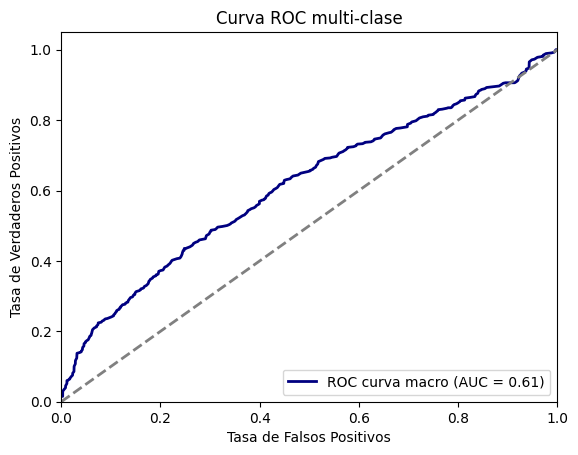

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Como los datos están cargados en `images_array` y `labels_int`
# images_array: (1772, 64, 64, 3)
# labels_int: (1772,)

# Hacer predicciones
y_pred = model.predict(test_images)

# Convertir etiquetas verdaderas y predicciones a forma binarizada
test_labels_binarized = label_binarize(test_labels, classes=range(75))

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(75):
    if np.sum(test_labels_binarized[:, i]) > 0:  # Asegurarse de que hay al menos una muestra de cada clase
        fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio macro del ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(75) if i in roc_auc]))

# Interpolar todas las curvas ROC a estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(75):
    if i in roc_auc:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Promediar y calcular el AUC
mean_tpr /= len(roc_auc)
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Dibujar la curva ROC promedio
plt.figure()
plt.plot(all_fpr, mean_tpr, color='navy', lw=2, label=f'ROC curva macro (AUC = {roc_auc["macro"]:0.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC multi-clase')
plt.legend(loc="lower right")
plt.show()